### Notebook 1:  Clustering con K-means
En este notebook vamos a implementar el algoritmo de clustering K-means en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [1]:
library(cluster)
library(ggplot2)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
summary(datos)

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

Ejercicio 1: describa los datos y discuta la pertinencia de realizar un análisis de clustering o agrupamiento

In [2]:
datos

,WATER,PROTEIN,FAT,LACTOSE,ASH
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10
CAMEL,87.7,3.5,3.4,4.8,0.71
BISON,86.9,4.8,1.7,5.7,0.90
BUFFALO,82.1,5.9,7.9,4.7,0.78
GUINEA_PIG,81.9,7.4,7.2,2.7,0.85
CAT,81.6,10.1,6.3,4.4,0.75


# RESPUESTA
Los datos muestran los aportes nutricionales de la composición de la leche de varios animales. 
La idea seria que a partir de estos datos y el algoritmo de k-means podamos crear grupos de similitud entre cada animal,
y encontrar clases de animales marcadas, después sería poder predecir la clase de otro animal según los atributos de leche.

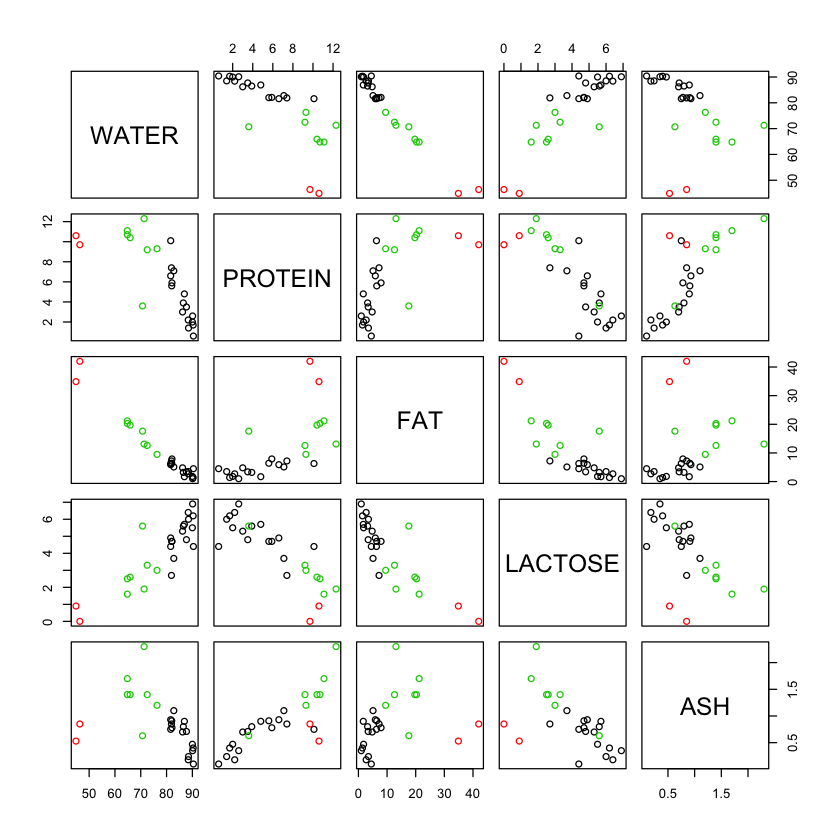

In [3]:
#ingresar valor de k0 
k0=3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

# RESPUESTA
En general los grupos diferenciados por el modelo kmeans se mantiene al comparar los aportes entre los nutrientes.


Ejercicio 2: Interprete y comente los resultados obtenidos. 

K-means clustering with 3 clusters of sizes 16, 2, 7

Cluster means:
     WATER   PROTEIN      FAT  LACTOSE      ASH
1 86.06250  4.275000  4.17500 5.118750 0.635625
2 45.65000 10.150000 38.45000 0.450000 0.690000
3 69.47143  9.514286 16.28571 2.928571 1.432857

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          1          1          1 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         1          1          1          1          1          1          1 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         1          1          3          3          3          3          3 
  REINDEER      WHALE       SEAL    DOLPHIN 
         3          3          2          2 

Within cluster sum of squares by cluster:
[1] 377.2215  27.1912 299.9911
 (between_SS / total_SS =  89.9 %)

Available components:

[1] "cluster"      "centers"

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,1.243827,0.0248324,0.07949783,-0.02299768,0.004865841
2,-3.831081,-2.2408320,0.09790001,-0.02910750,-0.029457957
3,-1.748439,0.5834780,-0.20968076,0.06088255,-0.002705362


,WATER,PROTEIN,FAT,LACTOSE,ASH
1,86.06250,4.275000,4.17500,5.118750,0.635625
2,45.65000,10.150000,38.45000,0.450000,0.690000
3,69.47143,9.514286,16.28571,2.928571,1.432857


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          1          1          1 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         1          1          1          1          1          1          1 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         1          1          3          3          3          3          3 
  REINDEER      WHALE       SEAL    DOLPHIN 
         3          3          2          2

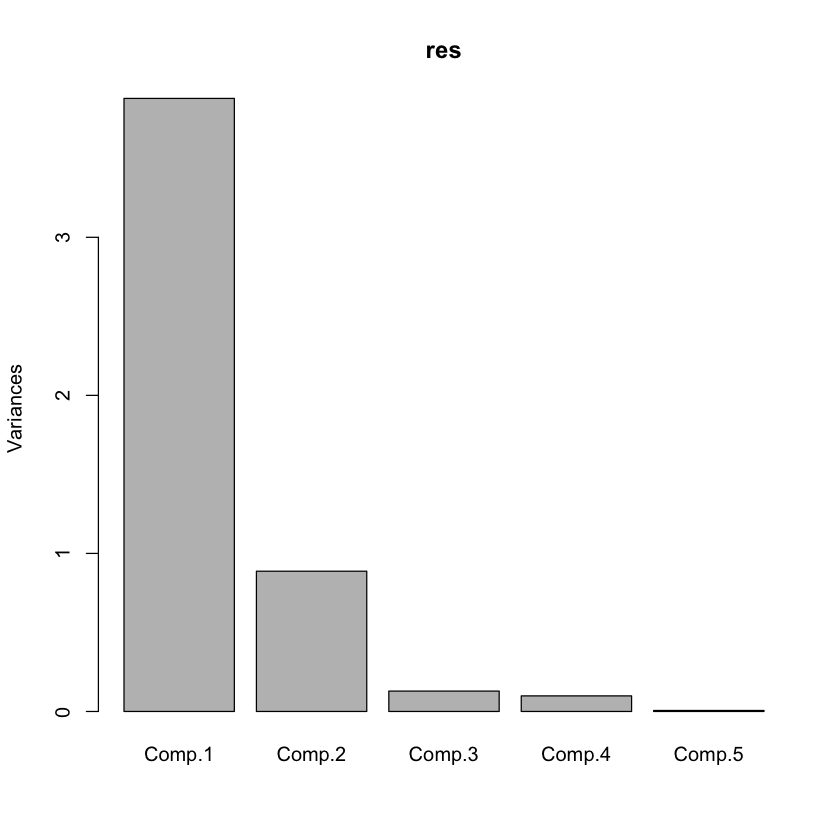

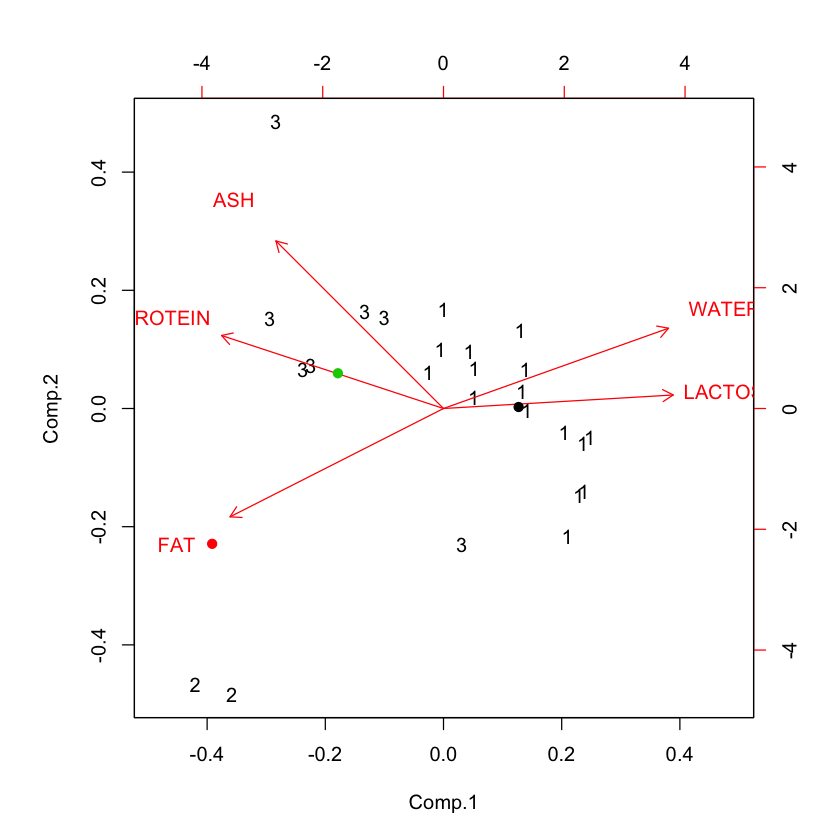

In [19]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
cl
res2
cl$centers
cl$cluster
plot(res)
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)


# RESPUESTA
se ve el grafico que compara los centros de cada grupo en el plano de componentes principales se aprecian que las
leches de grupo uno tienen más presencia de proteína y calcio, el grupo 2 tienen más grasa y el grupo 3 tienen
más agua y lactosa

Ejercicio 3: Repita el procedimiento considerando 2 y 4 grupos. Discuta sus resultados.

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,1.112848,0.06603277,0.09432454,-0.03162076,0.0008469003
2,-2.364801,-0.14031964,-0.20043965,0.06719411,-0.0017996632


K-means clustering with 2 clusters of sizes 17, 8

Cluster means:
     WATER  PROTEIN       FAT  LACTOSE       ASH
1 85.48824 4.570588  4.488235 4.994118 0.6688235
2 62.66250 9.700000 22.675000 2.300000 1.2762500

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          1          1          1 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         1          1          1          1          1          1          1 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         1          1          1          2          2          2          2 
  REINDEER      WHALE       SEAL    DOLPHIN 
         2          2          2          2 

Within cluster sum of squares by cluster:
[1]  521.8994 1664.9235
 (between_SS / total_SS =  68.8 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] 

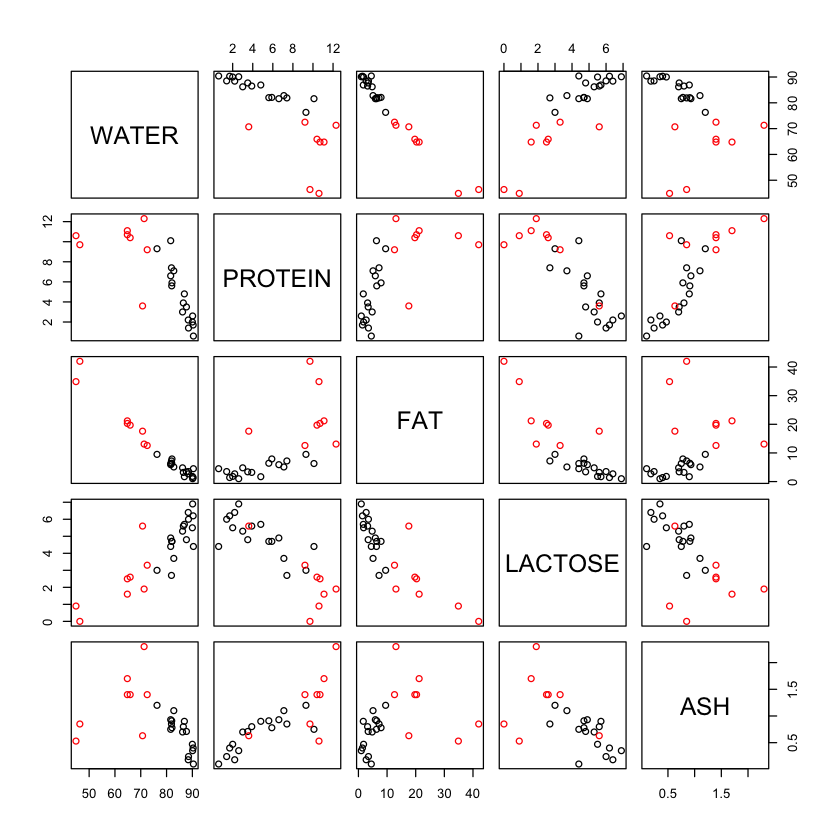

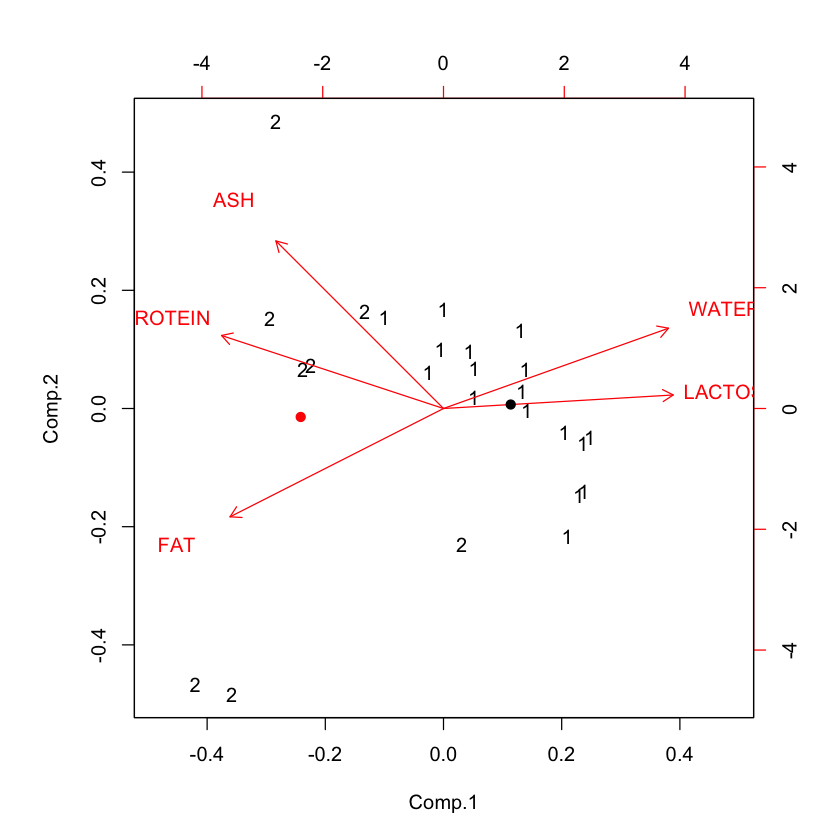

In [21]:
#ingresar valor de k0 
k0=2
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5
1,-1.87604083,0.5598512,-0.299886203,0.09929465,0.007419768
2,-3.83108138,-2.2408320,0.097900012,-0.02910750,-0.029457957
3,1.87606405,-0.2017241,-0.007713097,0.09635908,-0.003291286
4,0.02253818,0.4485425,0.240092595,-0.21444910,0.006758595


K-means clustering with 4 clusters of sizes 6, 2, 10, 7

Cluster means:
     WATER   PROTEIN      FAT  LACTOSE       ASH
1 68.33333  9.550000 17.41667 2.916667 1.4716667
2 45.65000 10.150000 38.45000 0.450000 0.6900000
3 88.50000  2.570000  2.80000 5.680000 0.4850000
4 81.18571  7.428571  6.90000 4.014286 0.9314286

Clustering vector:
     HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         3          3          3          3          3          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         4          4          4          4          3          3          4 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          4          4          1          1          1          1 
  REINDEER      WHALE       SEAL    DOLPHIN 
         1          1          2          2 

Within cluster sum of squares by cluster:
[1] 191.74708  27.19120  59.41225  63.53491
 (between_SS / tot

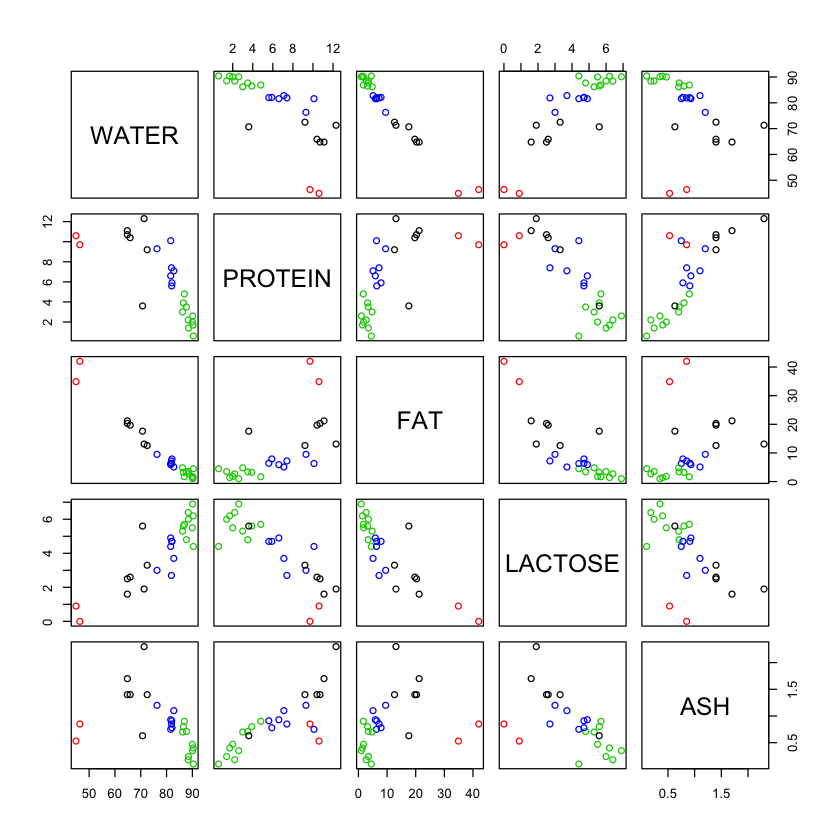

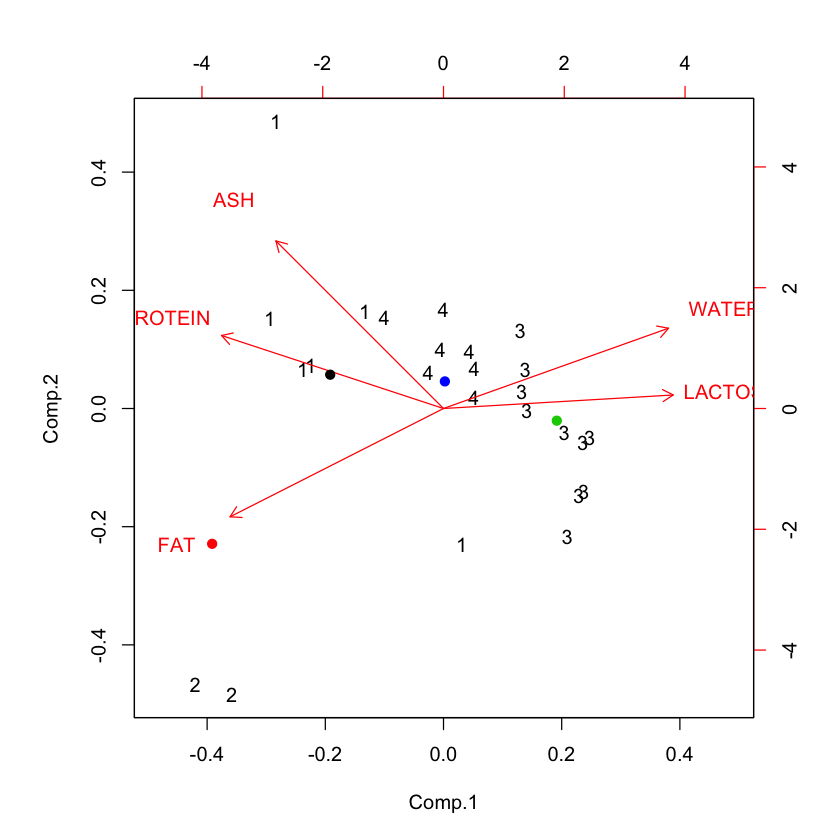

In [22]:
#ingresar valor de k0 
k0=4
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)

# RESPUESTA 3

Al usar el valor de k =2 los únicos 2 animales del grupo 2 fueron adoptados por el grupo 1 y el grupo 3 se quedó como estaba
con k =4 se mantuvo ese grupo de 2 animales con fuerte indice de grasa, pero se formó un nuevo grupo 4 en el centro sin mucha predominación de componentes

[1] -4077.057
[1] -1301.16
[1] -297.8278
[1] -93.68182
[1] -55.60299
[1] -20.50154
[1] -17.0859
[1] -4.69266
[1] 2.611187
[1] -24.77536
[1] -1.611908
[1] -3.574165
[1] -6.455833
[1] 3.388663
[1] -0.1842667
[1] -6.156225
[1] -0.54285
[1] -5.9724
[1] NA
[1] NA


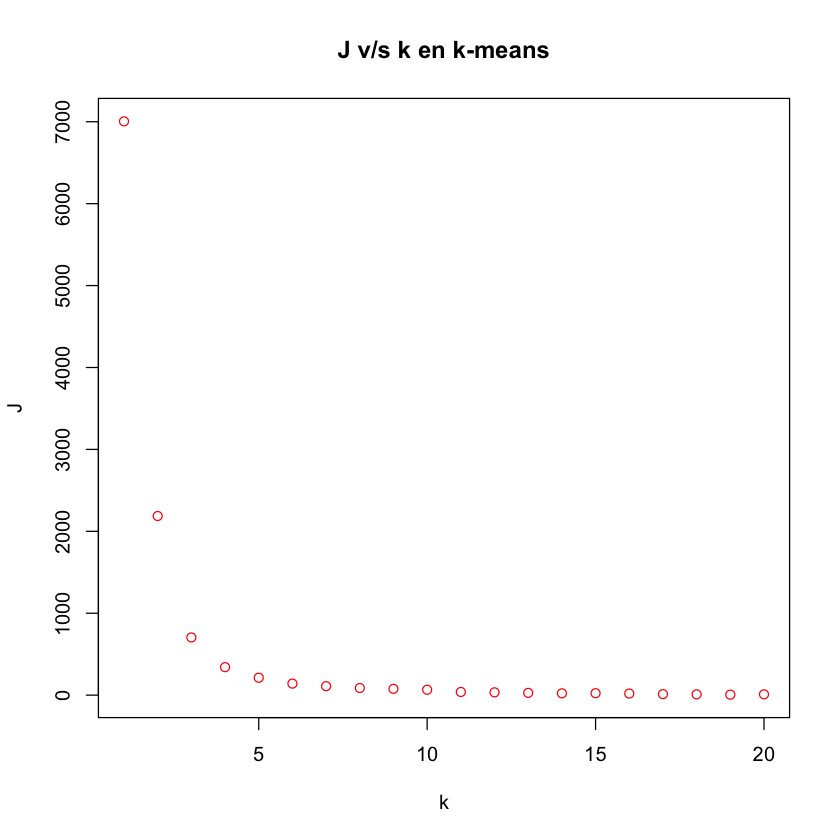

In [42]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,20)
fin_iter<-20


for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}
for (i in  1:20){
    print((J[i+1]-J[i])-(J[i+2]-J[i+1])/2)
    
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

In [26]:
J

[1] 7005.089144 2186.822914  704.403726  341.885448  212.504458  180.913750
 [7]  109.515408   87.337075   77.152208   49.961008   43.176142   53.997525
[13]   31.566192   25.573267   22.959703   16.985667   14.388050    9.238733
[19]    6.209000   11.764250

Ejercicio 4: de acuerdo al gráfico obtenido, cuál es el valor de K mas apropiado?
Agregue código para automatizar este criterio.

# RESPUESTA 4
El valor más apropiado de K es el K=3 porque existe una mayor deferencia ente la imagen de k2 y k4 que son sus antecesores y sucesores.

Ejercicio 5: Realice un análisis de clustering con el conjunto de datos DatosUsoFacebook.csv
Interprete sus resultados.

       R1              R2              R3              R4       
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:2.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :3.000   Median :3.000   Median :3.000   Median :2.000  
 Mean   :2.556   Mean   :2.604   Mean   :2.519   Mean   :2.262  
 3rd Qu.:3.000   3rd Qu.:3.000   3rd Qu.:3.000   3rd Qu.:3.000  
 Max.   :4.000   Max.   :4.000   Max.   :4.000   Max.   :4.000  
       R5              R6              R7              R8       
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:2.000   1st Qu.:2.000  
 Median :1.000   Median :2.000   Median :2.000   Median :3.000  
 Mean   :1.348   Mean   :1.882   Mean   :2.374   Mean   :2.642  
 3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.:3.000  
 Max.   :3.000   Max.   :4.000   Max.   :4.000   Max.   :4.000  
       R9             R10             R11             R12       
 Min.   :1.000   Min.   :

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11,Comp.12,Comp.13,Comp.14,Comp.15,Comp.16
1,-0.2279178,1.034200972,0.5784143,-0.44680028,0.27561414,0.2733027,0.20496976,0.07230730,0.03024072,-0.02953483,-0.02439607,-0.08990046,0.08261943,0.009865718,-0.04799471,-0.128847423
2,2.1614504,-0.190230594,0.1968067,0.20793741,-0.01430279,-0.2514306,-0.08081801,0.06836916,0.09686622,-0.08078775,0.08412014,0.03295768,-0.10619854,-0.039260557,-0.01147246,-0.003118722
3,-1.9175502,-1.102958527,0.2630561,-0.06747301,0.34052755,-0.1804201,0.32186241,-0.19147639,0.23958232,-0.19619499,0.01925345,-0.10839459,-0.11317238,-0.021329320,-0.08004841,0.005298145
4,-0.3021141,0.004826899,-0.9496043,0.29800790,-0.51743236,0.1017351,-0.37260148,0.01252674,-0.30212664,0.25343863,-0.06832800,0.14065493,0.10341340,0.042819681,0.11883980,0.125143596


K-means clustering with 4 clusters of sizes 50, 47, 39, 51

Cluster means:
        R1       R2       R3       R4       R5       R6       R7       R8
1 2.980000 2.800000 2.500000 2.240000 1.220000 1.720000 2.300000 2.860000
2 2.936170 2.936170 3.042553 2.340426 1.638298 1.723404 2.723404 3.000000
3 2.051282 2.000000 1.641026 1.871795 1.076923 2.410256 2.153846 1.846154
4 2.176471 2.568627 2.725490 2.509804 1.411765 1.784314 2.294118 2.705882
        R9      R10      R11      R12      R13      R14      R15      R16
1 1.300000 1.900000 3.320000 1.400000 1.600000 1.140000 1.620000 1.180000
2 1.744681 1.893617 2.680851 2.404255 2.659574 1.595745 2.382979 1.765957
3 1.256410 2.384615 3.692308 1.641026 2.256410 1.256410 1.384615 1.153846
4 1.235294 1.745098 3.490196 1.549020 3.313725 1.333333 1.450980 1.196078

Clustering vector:
  [1] 3 3 3 4 4 4 4 3 4 3 4 3 4 2 2 1 3 3 2 2 4 1 2 2 1 3 4 4 1 1 4 4 2 4 4 3 1
 [38] 4 3 4 1 3 2 4 1 1 3 1 4 4 1 4 4 2 2 1 4 2 2 2 1 2 1 1 4 2 1 2 2 2 4 1 1 2
 [75]

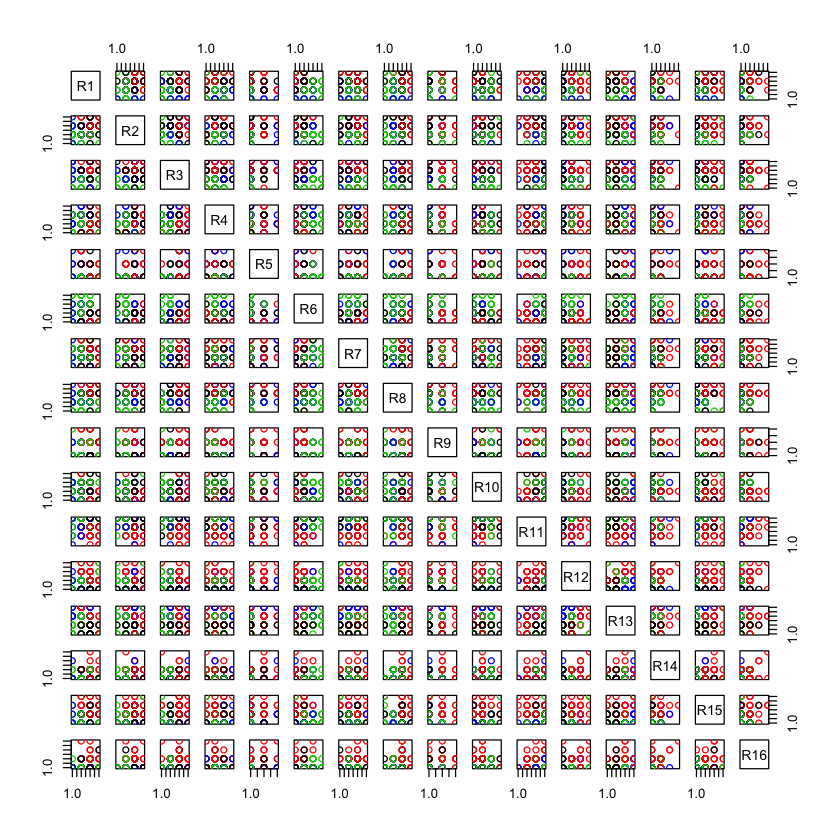

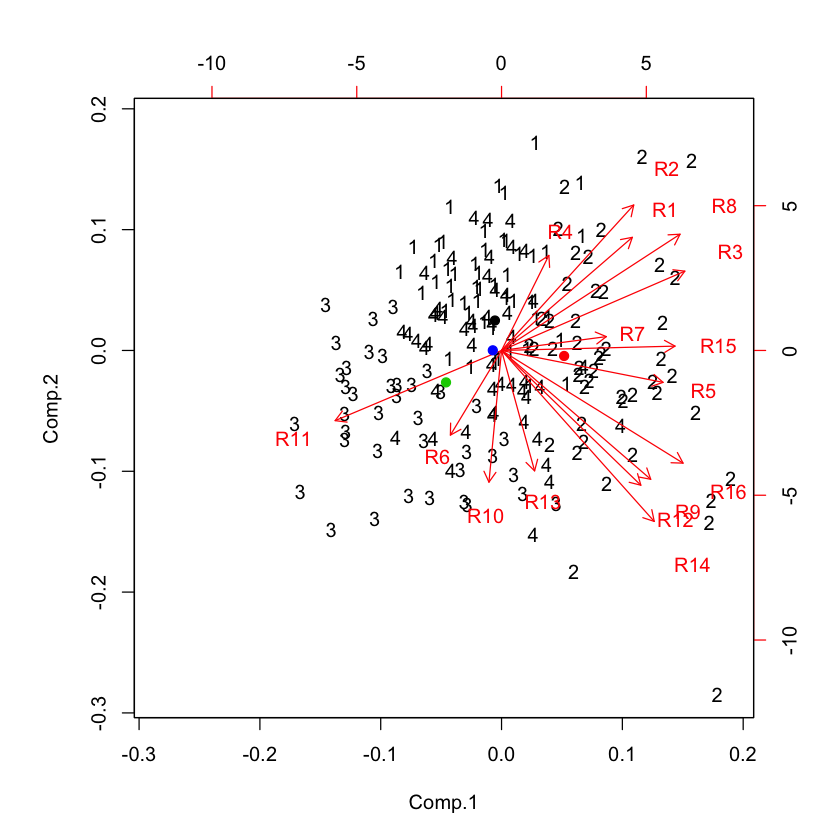

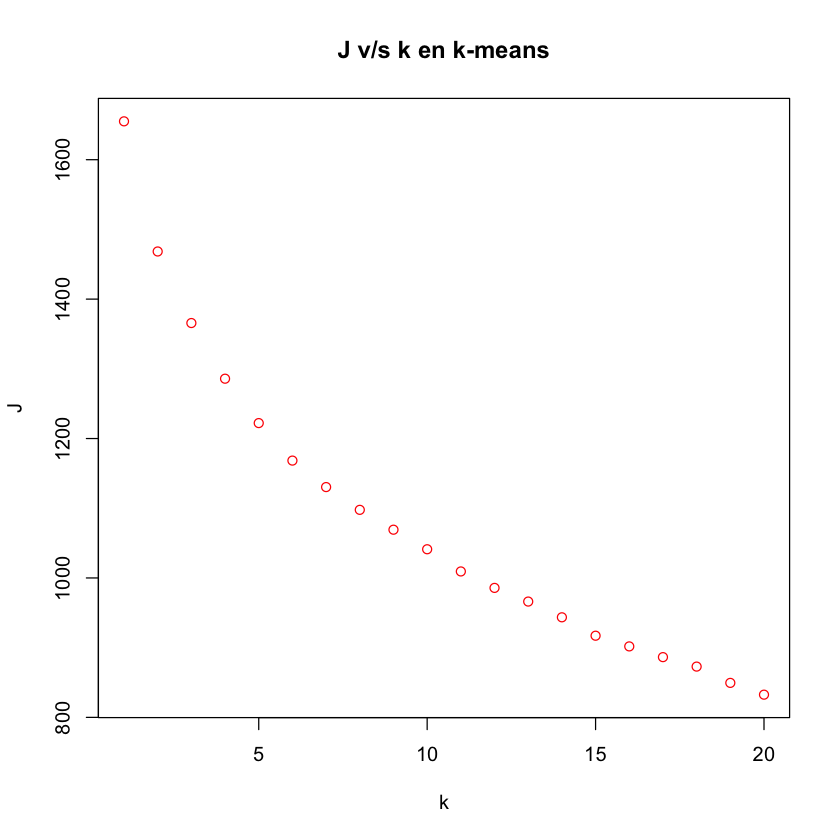

In [43]:
library(cluster)
library(ggplot2)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("DatosUsoFacebook.csv",sep= ";", header=TRUE)
summary(datos)
#ingresar valor de k0 
k0=4
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,20)
fin_iter<-20


for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

# RESPUESTA
dificil de analizar apartir de los graficos porque son muchos atributos , la funcion de perdida tampoco es muy clara para evaluar un buen numero de grupos 